In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Set plotting style
sns.set(style="whitegrid")


In [2]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

# View the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())

# Basic statistics
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
for i in df.columns:
    print(i ," ", df[i].unique())

Pregnancies   [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose   [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure   [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness   [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


In [4]:
# Features where zero values may be invalid
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median values grouped by Outcome
for feature in features_with_zeros:
    df[feature] = df.apply(lambda row: df.groupby('Outcome')[feature].transform('median')[row.name] if row[feature] == 0 else row[feature], axis=1)


In [5]:
for i in df.columns:
    print(i ," ", df[i].unique())

Pregnancies   [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose   [148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 126.  99. 196. 119. 143. 147.  97. 145. 117.
 109. 158.  88.  92. 122. 138. 102.  90. 111. 180. 133. 106. 171. 159.
 146.  71. 105. 101. 176. 150.  73. 187.  84.  44. 141. 114.  95. 129.
  79.  62. 131. 112. 113.  74.  83. 136.  80. 123.  81. 134. 142. 144.
  93. 163. 151.  96. 155.  76. 160. 124. 162. 132. 120. 173. 170. 128.
 108. 154.  57. 156. 153. 188. 152. 104.  87.  75. 179. 130. 194. 181.
 135. 184. 140. 177. 164.  91. 165.  86. 193. 191. 161. 167.  77. 182.
 157. 178.  61.  98. 127.  82.  72. 172.  94. 175. 195.  68. 186. 198.
 121.  67. 174. 199.  56. 169. 149.  65. 190.]
BloodPressure   [ 72.  66.  64.  40.  74.  50.  70.  96.  92.  80.  60.  84.  30.  88.
  90.  94.  76.  82.  75.  58.  78.  68. 110.  56.  62.  85.  86.  48.
  44.  65. 108.  55. 122.  54.  52.  98. 104.  95.  46. 102. 100.  61.
  24.  3

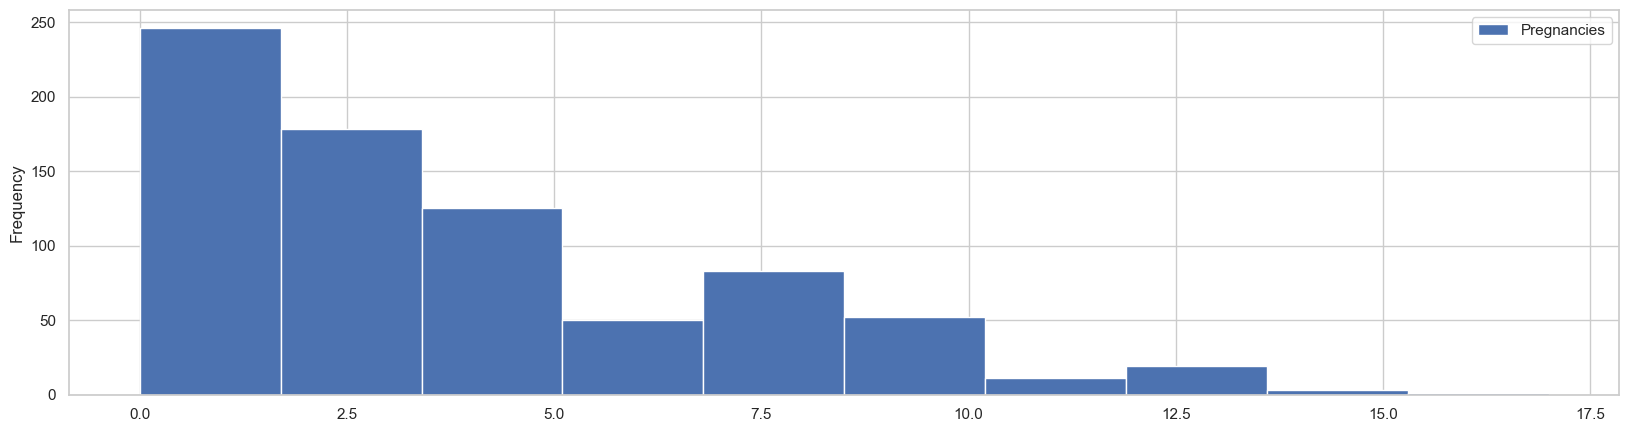

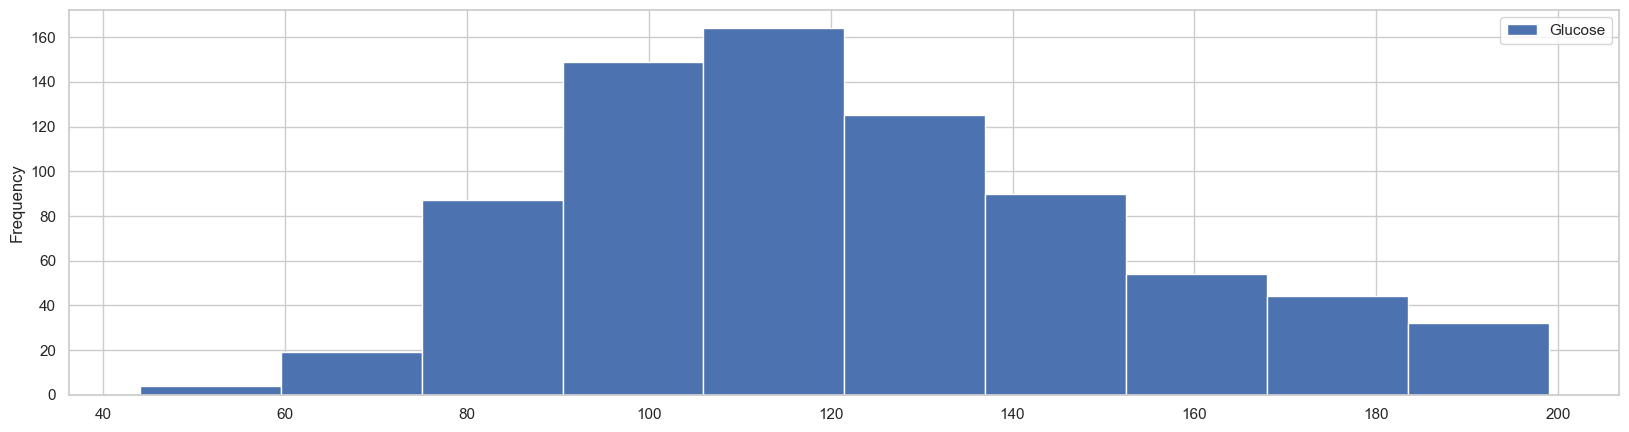

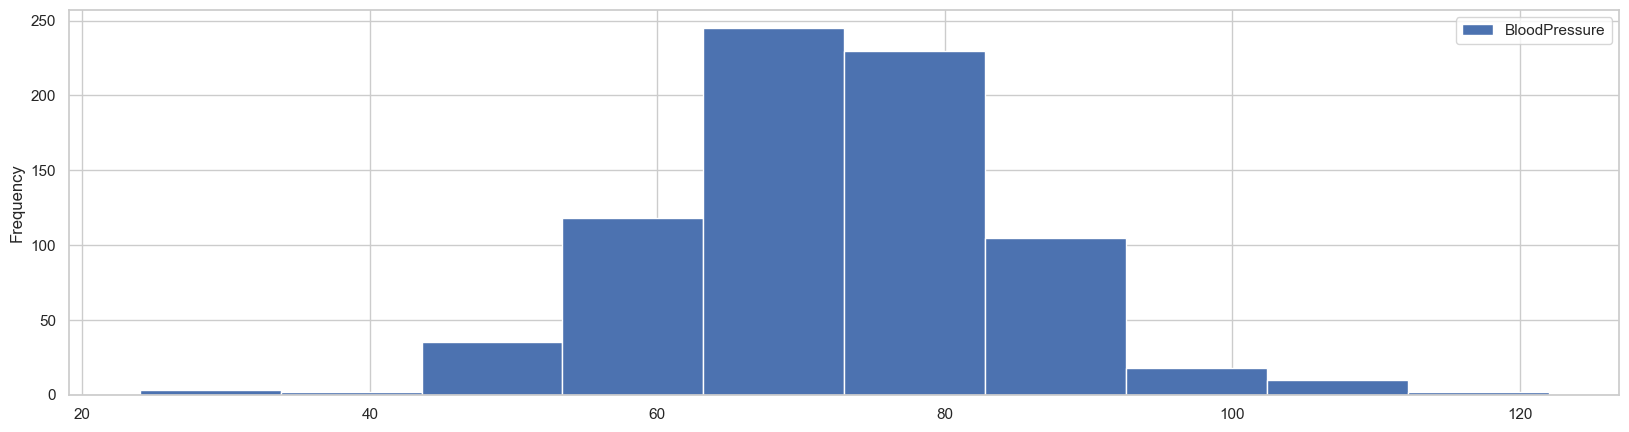

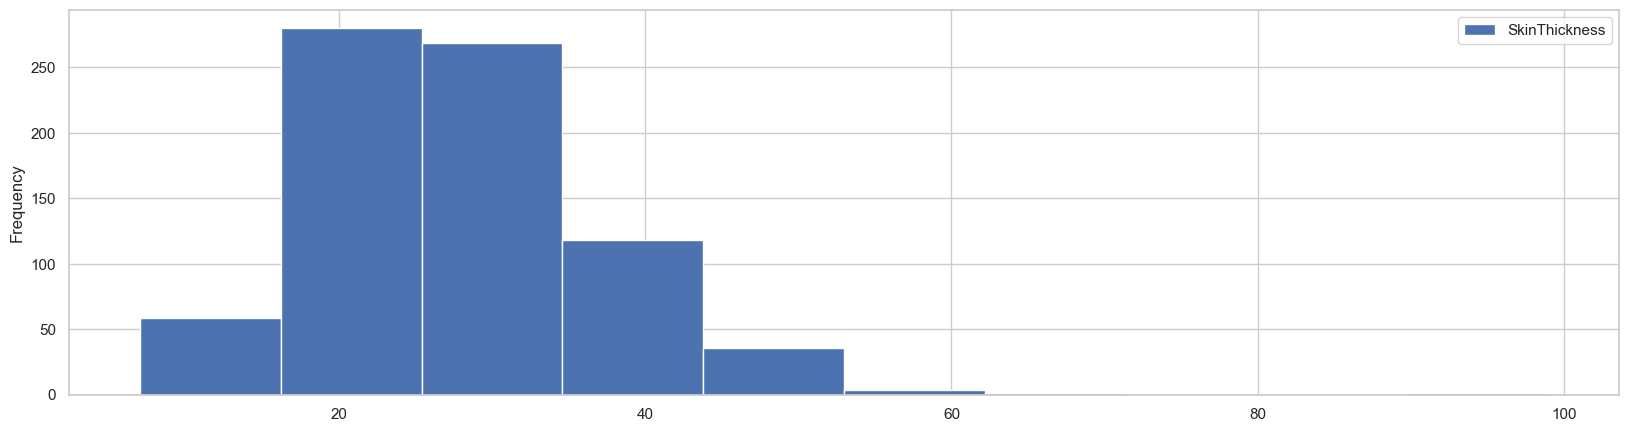

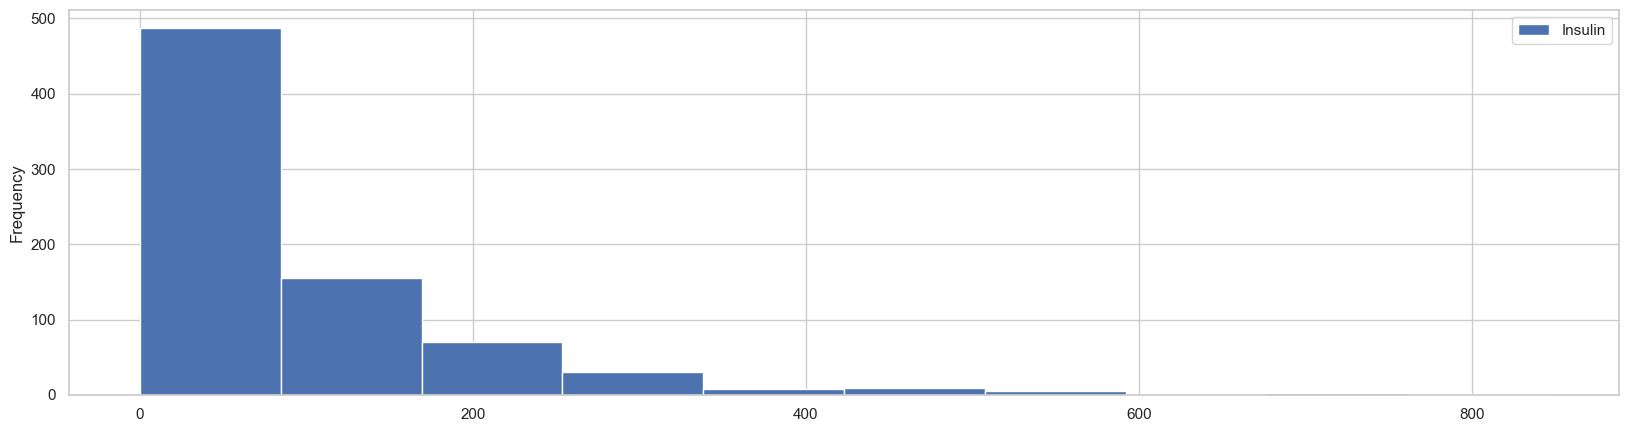

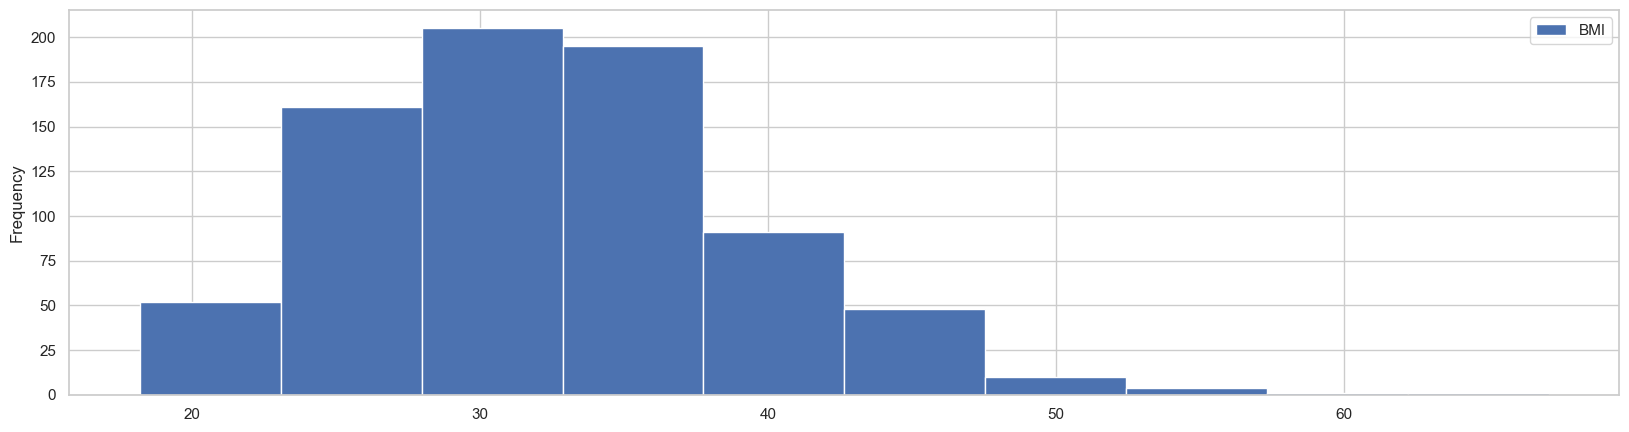

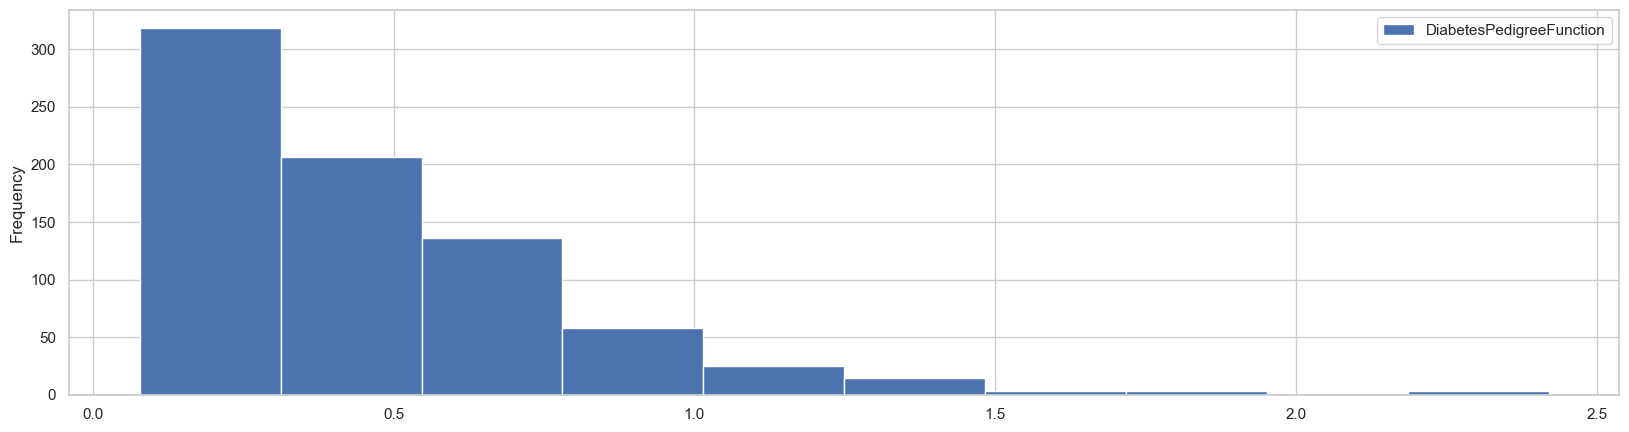

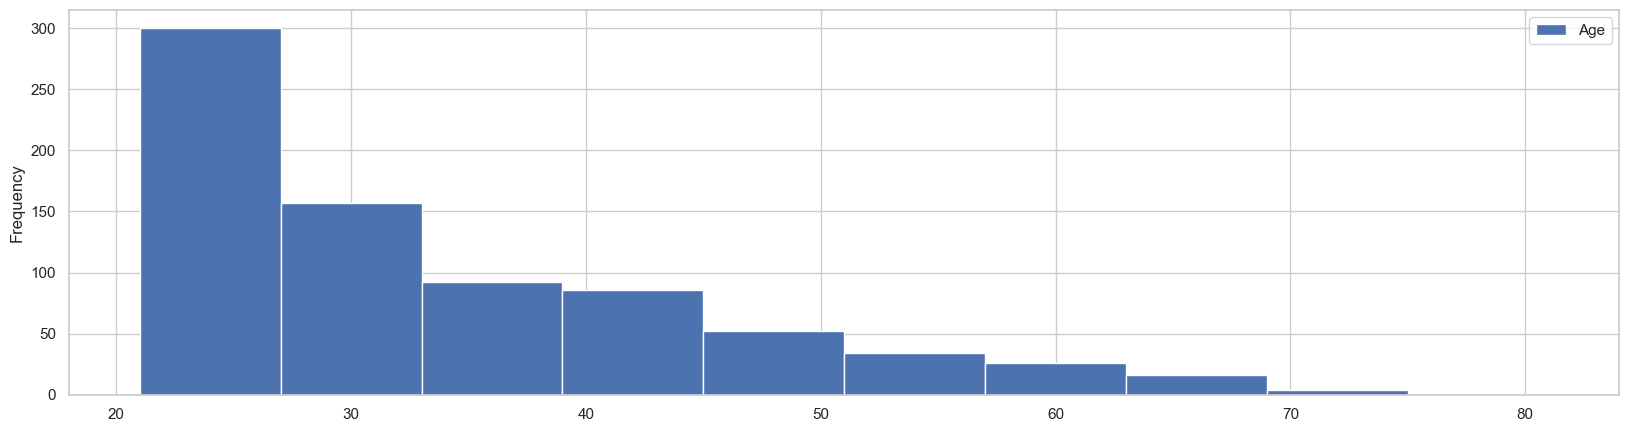

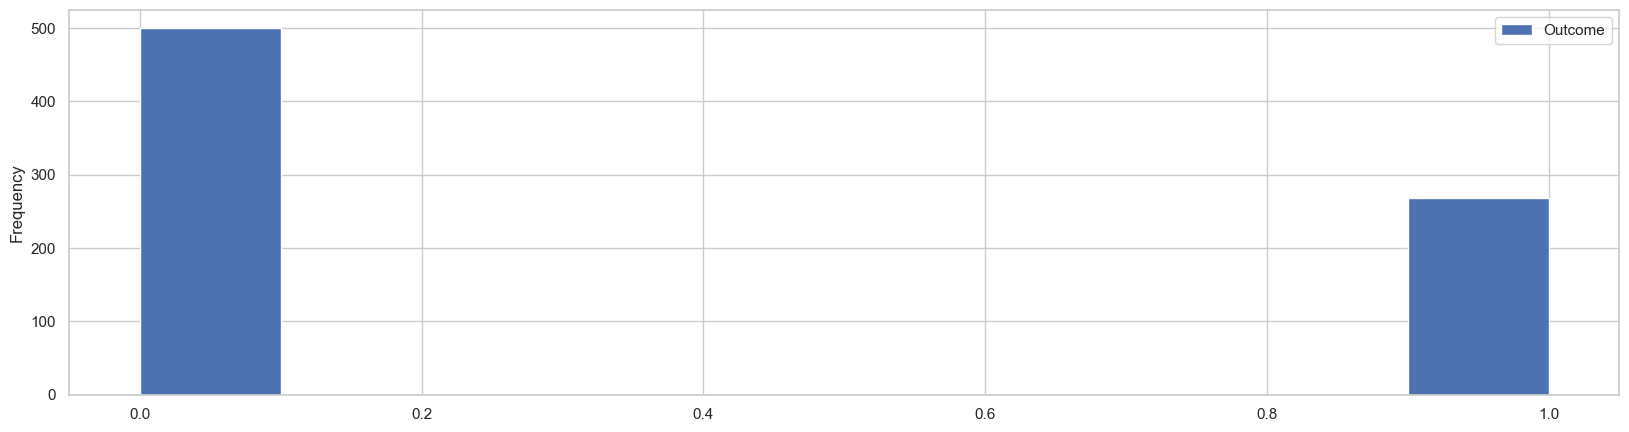

In [6]:
for i in df.columns:
    plt.rcParams['figure.figsize']=(20,5)
    df[i].plot(kind='hist',subplots=True)
    plt.legend()
    plt.show()

In [7]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209155,0.044593,-0.074531,0.023887,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.224684,0.215366,0.309058,0.236225,0.138353,0.268910,0.495990
BloodPressure,0.209155,0.224684,1.000000,0.159653,-0.043125,0.285945,-0.001336,0.325306,0.173316
SkinThickness,0.044593,0.215366,0.159653,1.000000,0.204425,0.573227,0.144541,0.063847,0.282844
Insulin,-0.074531,0.309058,-0.043125,0.204425,1.000000,0.157359,0.165705,-0.033698,0.057946
BMI,0.023887,0.236225,0.285945,0.573227,0.157359,1.000000,0.152779,0.027873,0.315606
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001336,0.144541,0.165705,0.152779,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325306,0.063847,-0.033698,0.027873,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.173316,0.282844,0.057946,0.315606,0.173844,0.238356,1.000000


<Axes: >

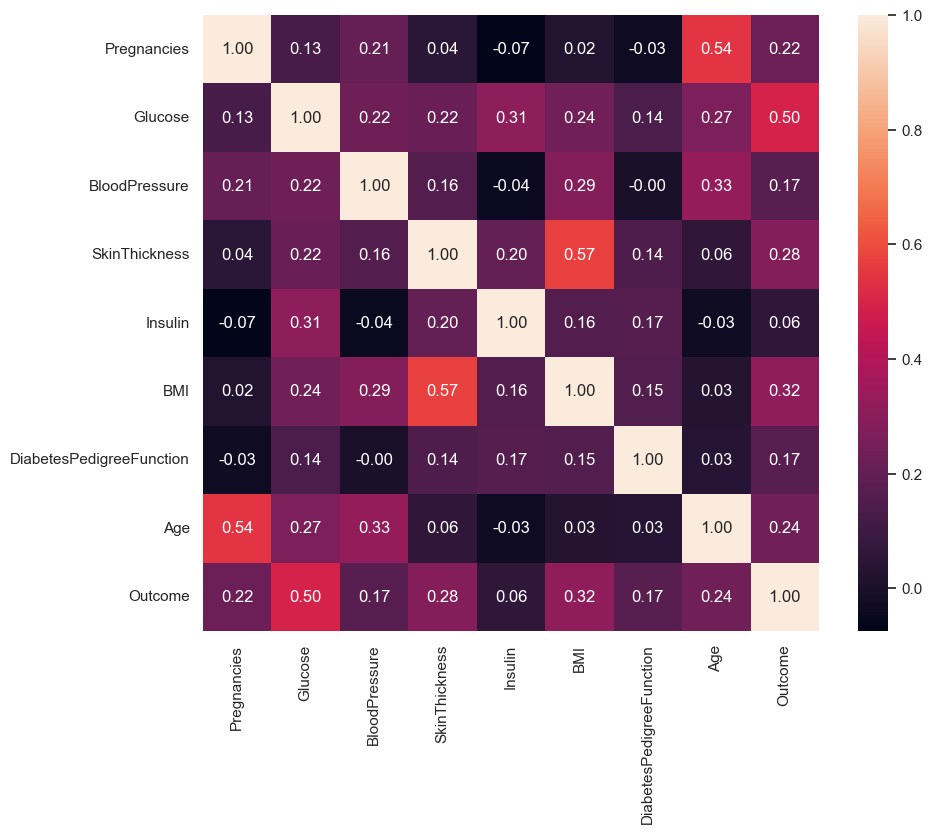

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')

In [9]:
X=df[['Glucose','SkinThickness' ,'BMI', 'Age']]
y=df['Outcome']

In [10]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Check the new class distribution
print(pd.Series(y_smote).value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


d:\python ml\Pima Indians Diabetes\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\python ml\Pima Indians Diabetes\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [13]:
# Define the model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        99
           1       0.83      0.89      0.86       101

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



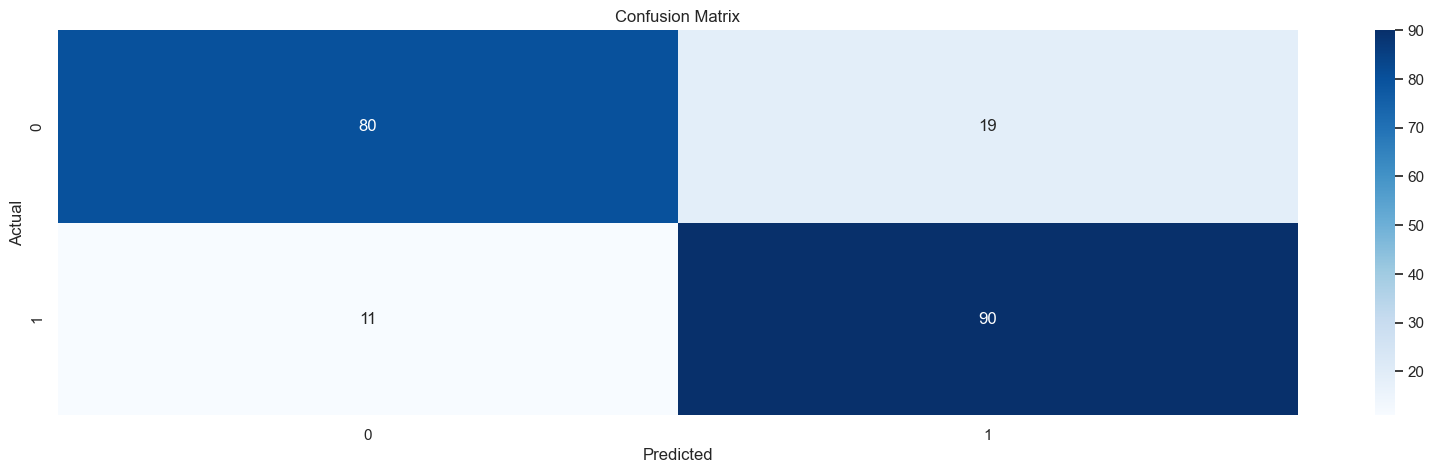

In [14]:
# Predictions on the test set
y_pred = best_rf.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [16]:
cv_scores = cross_val_score(best_rf, X_smote, y_smote, cv=10, scoring='f1')
print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())


Cross-validated F1 scores: [0.82352941 0.8        0.80808081 0.80392157 0.84536082 0.8490566
 0.96153846 0.91428571 0.89320388 0.85714286]
Mean F1 score: 0.8556120133450997
